In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import scipy.stats as st

from statsmodels.formula.api import ols

# Обработка данных

Сначала разобьём все файлы в папке по парам и считаем зашифрованное слово из названия файла.

In [3]:
data = []
dirpath = r'C:\Users\troma\Documents\8 семестр\Прикладная статистика\images_full\images'
for _, _, files in os.walk(dirpath):
    for file in files:
        #print(file)
        if file[:8] == 'modified':
            number = re.sub('[^\d+]', '', file)
            word = re.sub('[^a-z]', '', file[8:])[:-3]
            for file2 in files:
                if number in file2  and file2[:8] == 'original':
                    #print(number, file2)
                    break
            data.append((file2, file, word))
            print((file2, file, word))

('original_100136192.bmp', 'modified_100136192_case.bmp', 'case')
('original_100351981.bmp', 'modified_100351981_point.bmp', 'point')
('original_100620761.bmp', 'modified_100620761_woman.bmp', 'woman')
('original_102961711.bmp', 'modified_102961711_government.bmp', 'government')
('original_103713876.bmp', 'modified_103713876_group.bmp', 'group')
('original_103953357.bmp', 'modified_103953357_year.bmp', 'year')
('original_104534626.bmp', 'modified_104534626_work.bmp', 'work')
('original_10721260.bmp', 'modified_10721260_case.bmp', 'case')
('original_107663102.bmp', 'modified_107663102_thing.bmp', 'thing')
('original_110819517.bmp', 'modified_110819517_day.bmp', 'day')
('original_111081357.bmp', 'modified_111081357_woman.bmp', 'woman')
('original_112739982.bmp', 'modified_112739982_hand.bmp', 'hand')
('original_11339765.bmp', 'modified_11339765_day.bmp', 'day')
('original_113434246.bmp', 'modified_113434246_year.bmp', 'year')
('original_11345292.bmp', 'modified_11345292_case.bmp', 'case'

('original_624982170.bmp', 'modified_624982170_fact.bmp', 'fact')
('original_625151654.bmp', 'modified_625151654_week.bmp', 'week')
('original_625915845.bmp', 'modified_625915845_point.bmp', 'point')
('original_625937766.bmp', 'modified_625937766_day.bmp', 'day')
('original_626060564.bmp', 'modified_626060564_work.bmp', 'work')
('original_626463949.bmp', 'modified_626463949_man.bmp', 'man')
('original_627039354.bmp', 'modified_627039354_woman.bmp', 'woman')
('original_629091158.bmp', 'modified_629091158_thing.bmp', 'thing')
('original_629177030.bmp', 'modified_629177030_child.bmp', 'child')
('original_629549249.bmp', 'modified_629549249_work.bmp', 'work')
('original_630918934.bmp', 'modified_630918934_eye.bmp', 'eye')
('original_63194985.bmp', 'modified_63194985_person.bmp', 'person')
('original_634123544.bmp', 'modified_634123544_day.bmp', 'day')
('original_634979514.bmp', 'modified_634979514_eye.bmp', 'eye')
('original_635335056.bmp', 'modified_635335056_problem.bmp', 'problem')
('or

In [4]:
len(data)

1000

Теперь найдём, какие modified файлы содержат зашифрованные слова. Для этого используем t-test с $H_0: \mu=0,\ \ H_1: \mu \neq 0$ (так как дисперсию шума мы не знаем).

0.019218597019270107


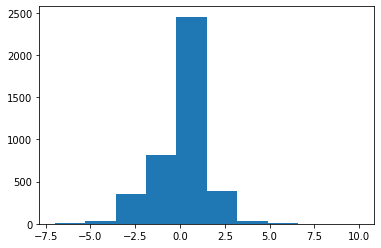

0.0


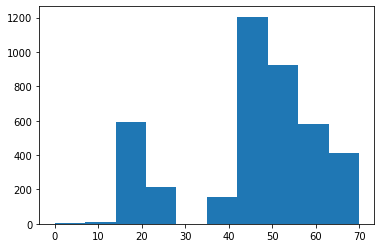

0.04885962353790321


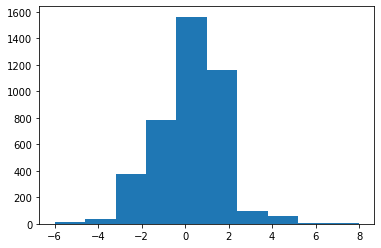

0.04458910163247434


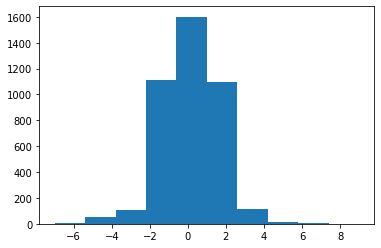

0.02066553268824623


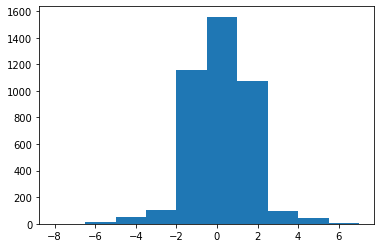

0.02448057273285555


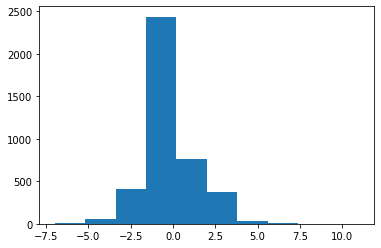

0.0


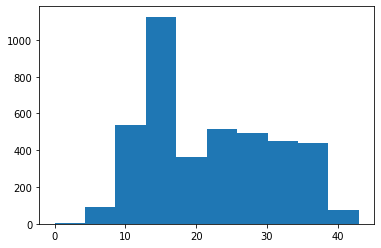

0.0


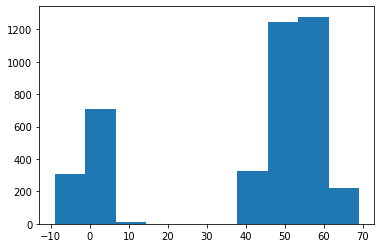

0.04990860578724712


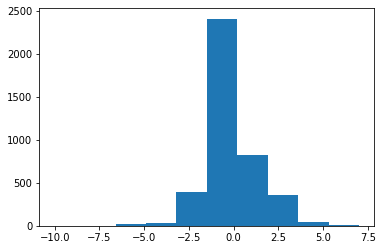

0.007863252951622662


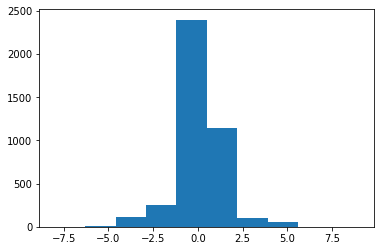

0.009181865934301271


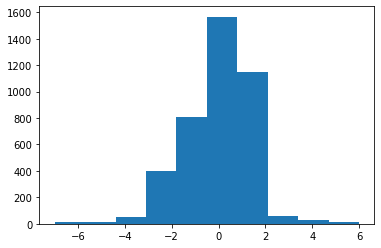

0.03556761926610345


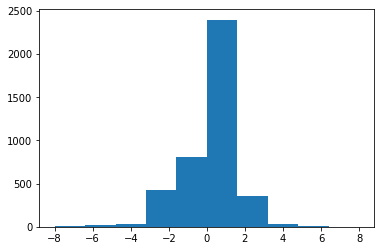

0.03908560430546401


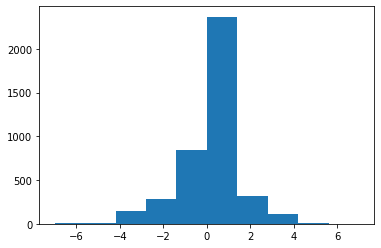

0.046211001374628295


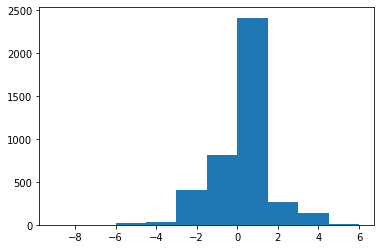

0.03863286988639194


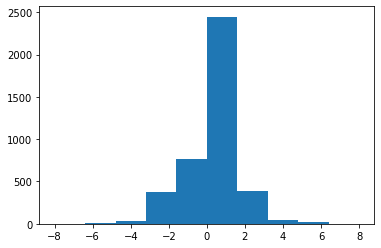

0.027927518393451804


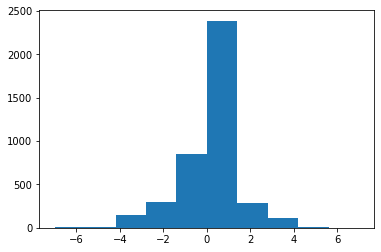

0.014039269184915886


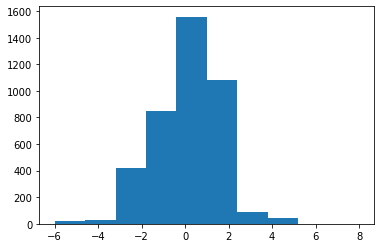

0.029365264419282017


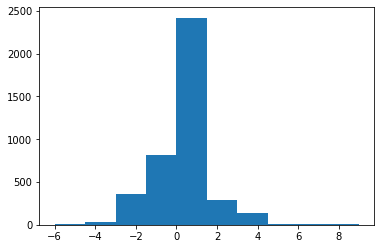

0.0003491082718585127


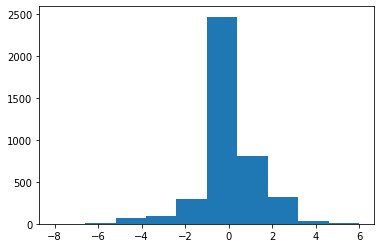

0.007139873183152549


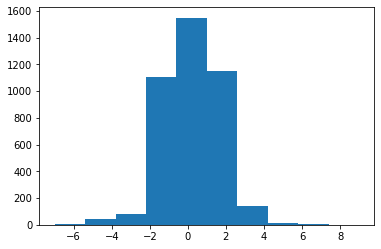

0.029109910733766963


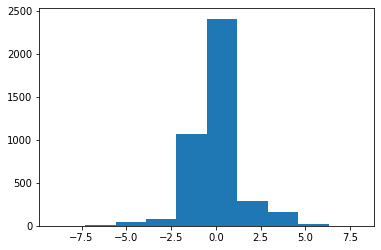

0.025651908705028665


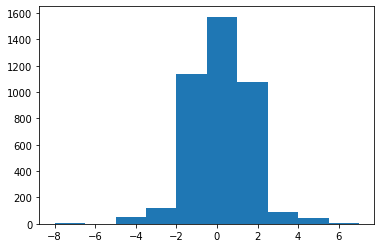

0.015528394843514155


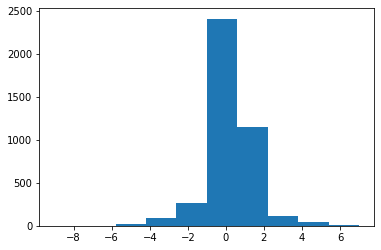

0.0459841879860685


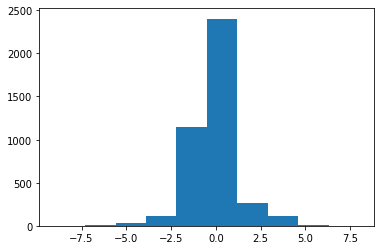

0.04671394082363421


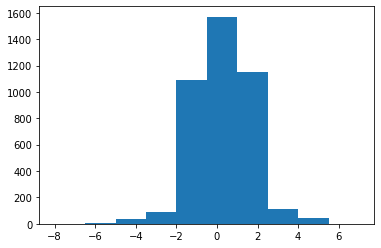

0.0057620860418013085


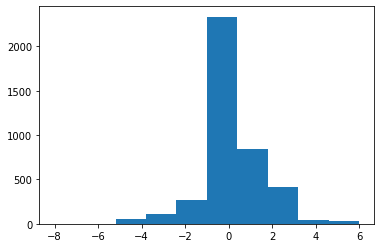

0.049764689582767585


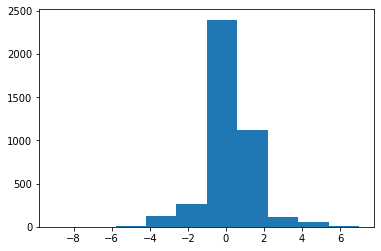

0.0


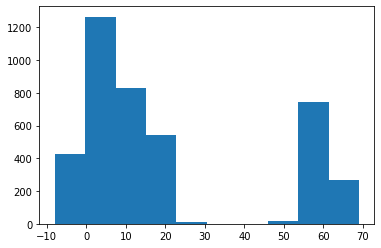

0.0


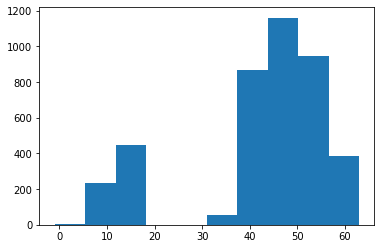

0.028380364594561554


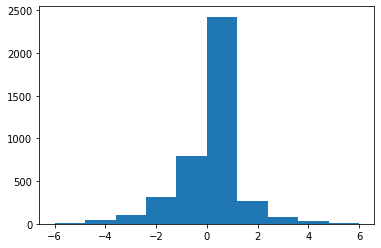

0.029354321588700757


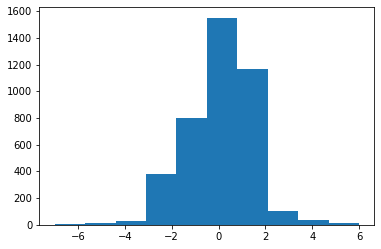

0.030079468278855465


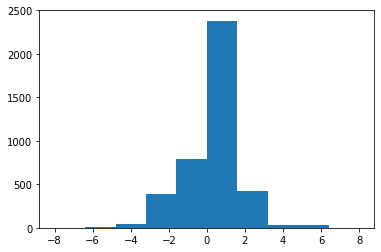

0.009857701182112774


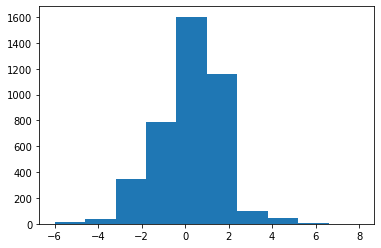

0.00020911354713725732


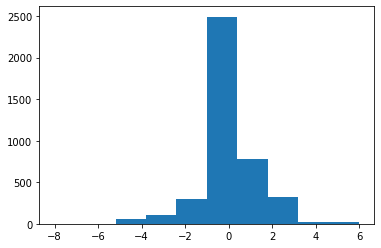

0.009415102677421237


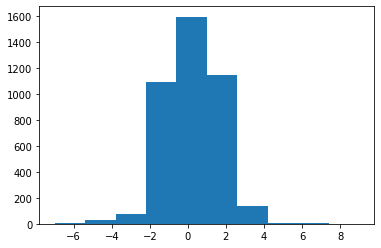

0.0


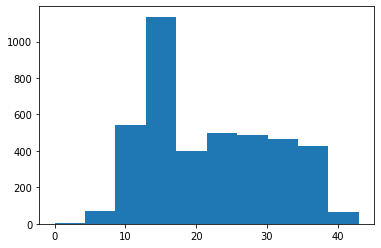

0.0005317912549809853


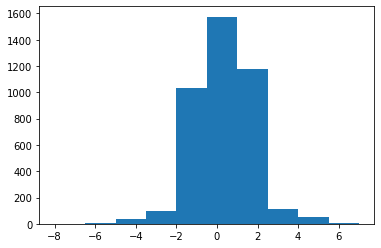

0.04311431283115982


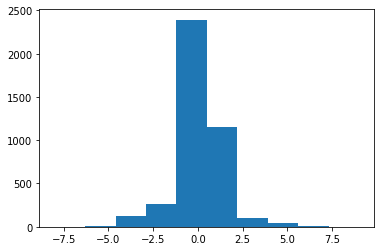

0.017111970350834664


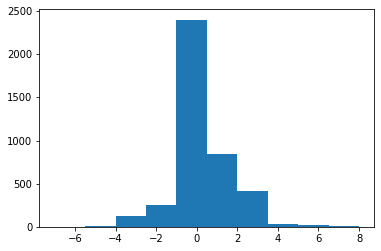

0.03318854077327377


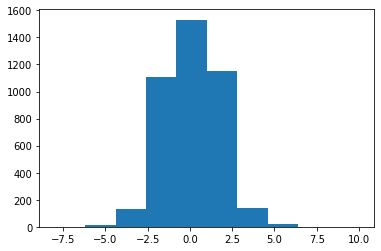

0.016855402235734937


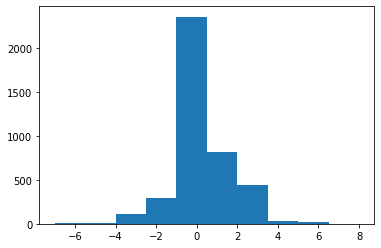

0.035287788121701386


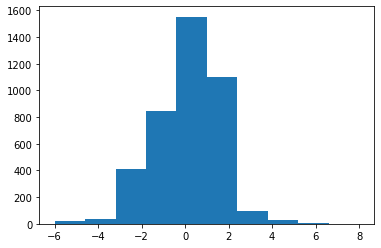

0.04899956574535666


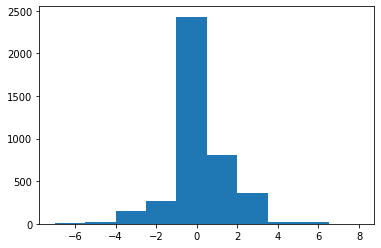

0.02143803759422195


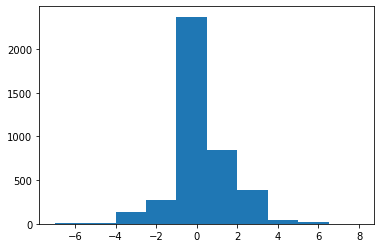

0.0428064073511391


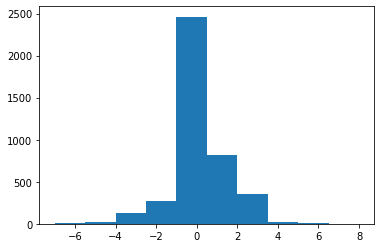

0.031477097336778455


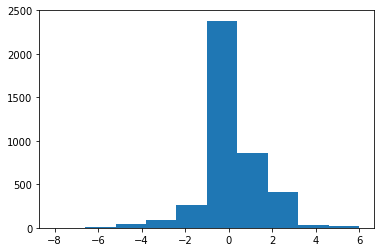

0.022912394653799257


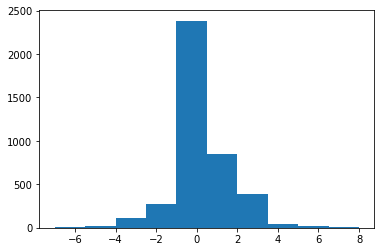

0.032084676037794684


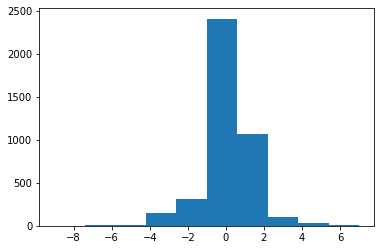

0.02115620617235642


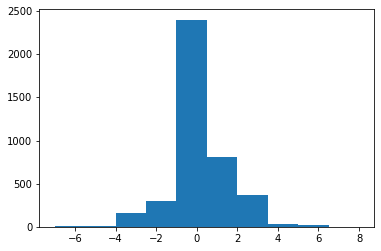

0.039189845957509385


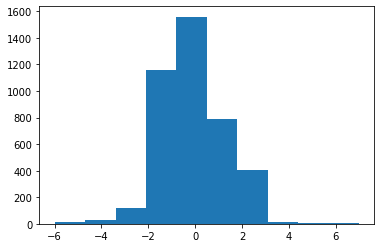

0.0


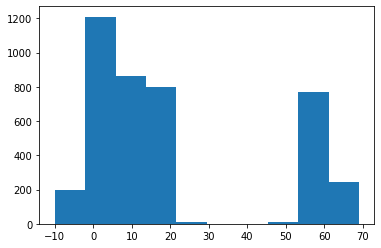

0.036786890164719706


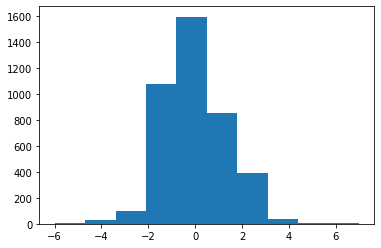

0.018001549609419146


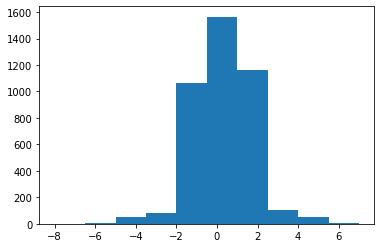

0.0


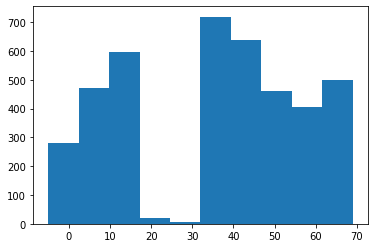

0.0


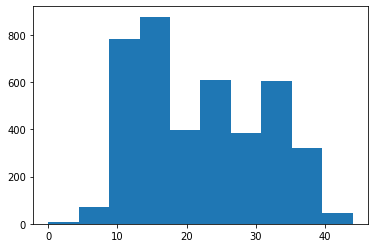

0.04757579511401254


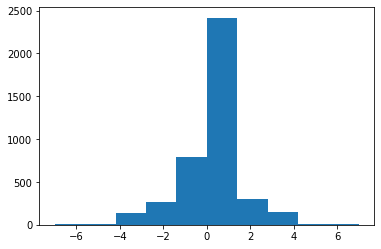

0.0


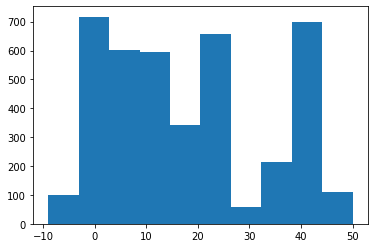

0.0027074799905964266


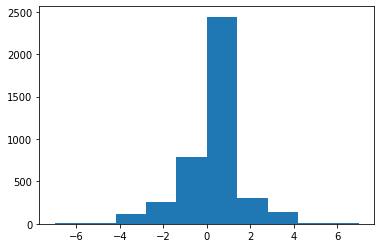

0.027424405255874054


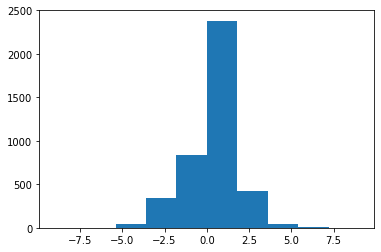

0.047119953281396974


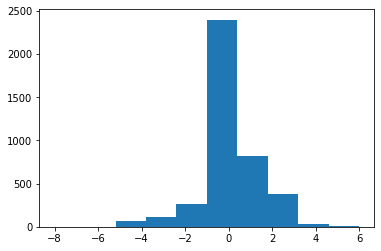

0.00328435536228076


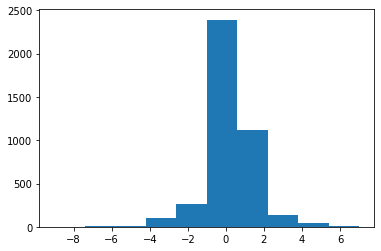

In [5]:
for obj in data:
    img_orig = np.int64(Image.open(os.path.join(dirpath, obj[0])))
    img_mod = np.int64(Image.open(os.path.join(dirpath, obj[1])))
    p_ttest = st.ttest_1samp((img_mod - img_orig).flatten(), 0, alternative='two-sided').pvalue
    if p_ttest < 0.05:
        print(p_ttest)
        plt.hist((img_mod - img_orig).flatten())
        plt.show()

Тут явно видно, что некоторые выборки ведут себя как нормальные со средним значением 0, а некоторые совсем не похожи на нормальные. Причём для вторых pvalue = 0.0. Здесь порог 0.05 слишком большой. Выберем поменьше.

0.0


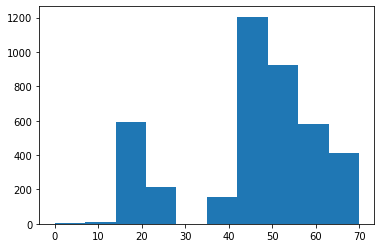

0.0


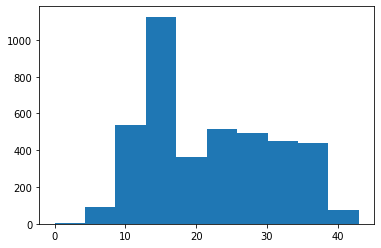

0.0


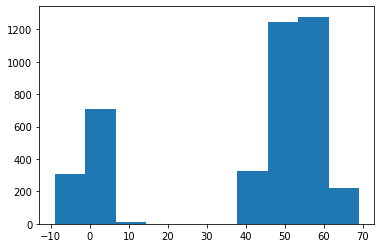

0.0


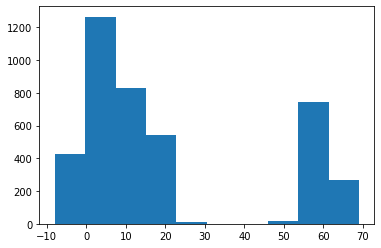

0.0


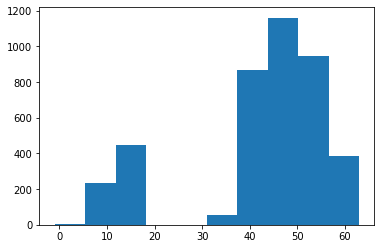

0.0


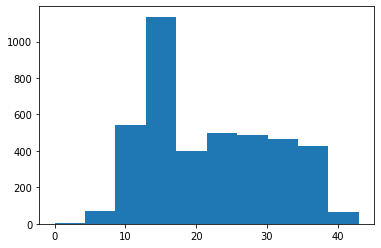

0.0


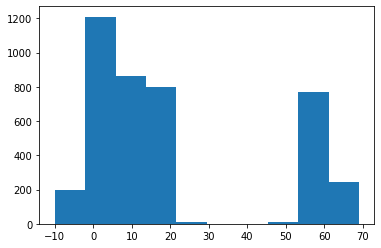

0.0


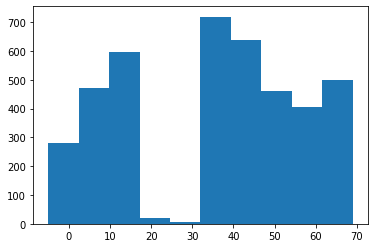

0.0


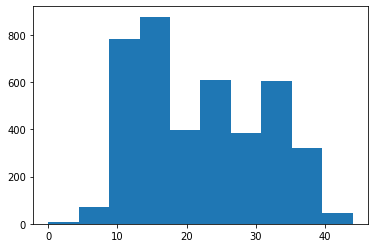

0.0


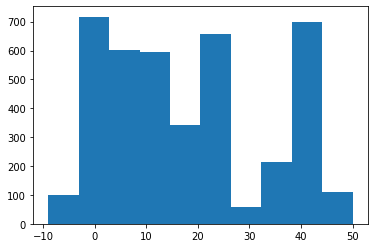

In [6]:
data_cleaned = []
for obj in data:
    img_orig = np.int64(Image.open(os.path.join(dirpath, obj[0])))
    img_mod = np.int64(Image.open(os.path.join(dirpath, obj[1])))
    p_ttest = st.ttest_1samp((img_mod - img_orig).flatten(), 0, alternative='two-sided').pvalue
    if p_ttest < 1e-4:
        print(p_ttest)
        plt.hist((img_mod - img_orig).flatten())
        plt.show()
        data_cleaned.append(obj)

In [7]:
len(data_cleaned)

10

Как и сказано в условии: 1% от всех данных содержит зашифрованные слова. 

# Линейная регрессия

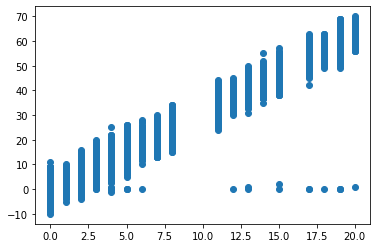

In [8]:
x = []
y = []
for obj in data_cleaned:
    img_orig = np.int64(Image.open(os.path.join(dirpath, obj[0])))
    img_mod = np.int64(Image.open(os.path.join(dirpath, obj[1])))
    #print(img_mod - img_orig)
    sample = (img_mod - img_orig).flatten()
    for i in range(len(sample)):
        word = obj[2]
        x.append(ord(word[i % len(word)]) - ord('a'))
        y.append(sample[i])
plt.scatter(x, y)

In [9]:
lm = ols('y ~ x', data=pd.DataFrame({'y': y, 'x': x})).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.945e+06
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        01:21:43   Log-Likelihood:            -1.0155e+05
No. Observations:               40960   AIC:                         2.031e+05
Df Residuals:                   40958   BIC:                         2.031e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0289      0.025      1.155      0.248      -0.020       0.078
x              3.1317      0.002   1394.702      0.000       3.127       3.136
==============================================================================
Omnibus:                    22466.527   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1864580.472
Skew:                          -1.777   Prob(JB):                         0.00
Kurtosis:                      35.862   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видим, данные очень хорошо ложатся на прямую  и регрессия говорит, что $\alpha = 3.1$. Теперь раскодируем слово.

diff -- массив разностей между оригинало и зашумленной картинкой.

In [10]:
img_mod = Image.open(r'C:\Users\troma\Documents\8 семестр\Прикладная статистика\images_full\modified_test.bmp')
img = Image.open(r'C:\Users\troma\Documents\8 семестр\Прикладная статистика\images_full\original_test.bmp')
np_img_mod = np.int64(img_mod)
np_img  = np.int64(img)
diff = np_img_mod - np_img
diff

array([[69, 22, 13, ..., 22, 13, 38],
       [44, 41, 13, ..., 44, 69, 56],
       [31, 25, 69, ..., 56, 60, 22],
       ...,
       [13, 56, 60, ..., 41, 13, 75],
       [35, 13,  3, ..., 25, 69, 22],
       [13, 53, 13, ...,  0,  0,  0]], dtype=int64)

Период подберём, посмотрев на гистограммы:

Для каждого из возможных значений p периода от 2 до 30 разобьём значения массива разностей diff на p частей. В каждой из частей находятся элементы массива diff.flatten(), находящиеся друг от друга на расстоянии кратном p. Рисовать же будем гистограмму только для одной из частей для каждого p.

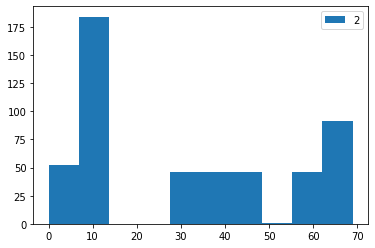

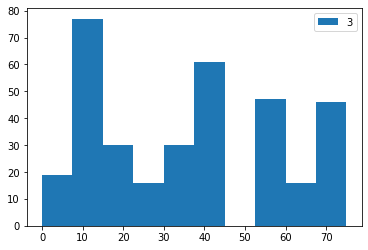

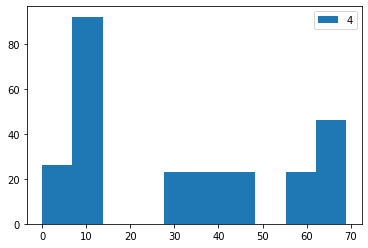

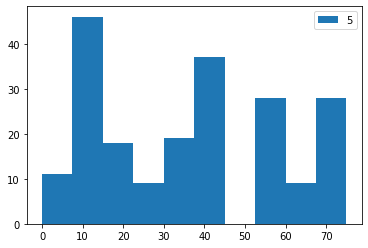

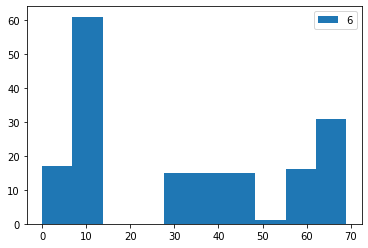

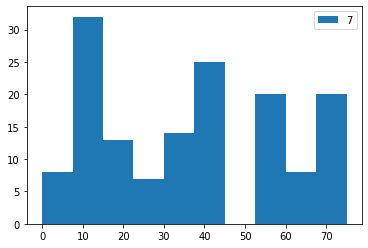

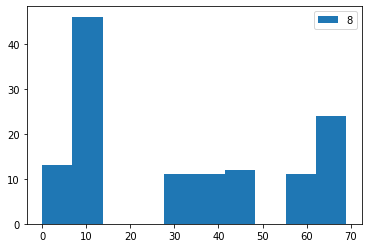

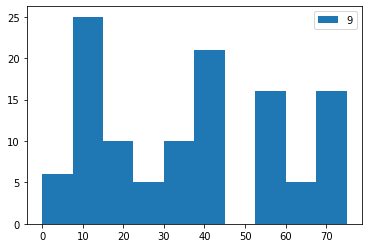

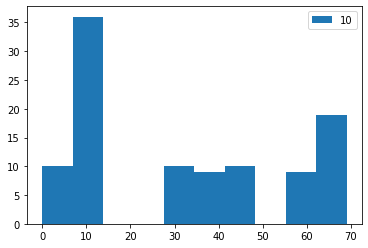

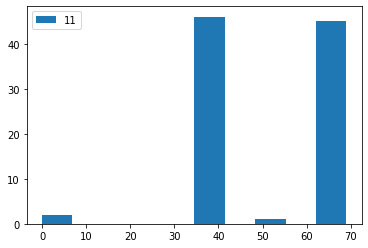

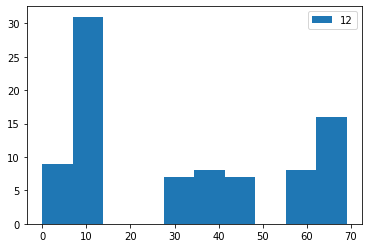

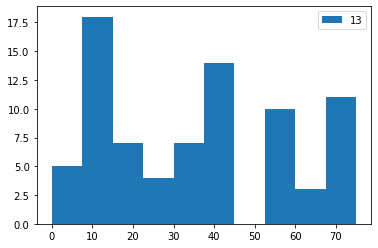

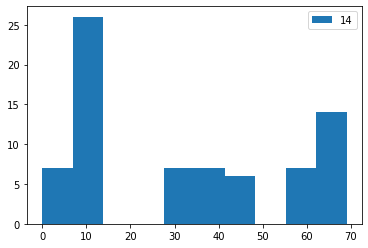

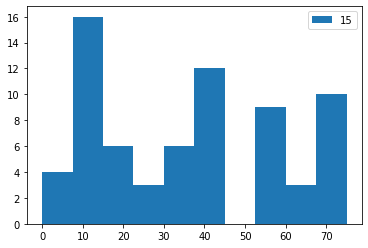

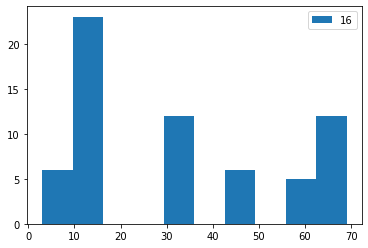

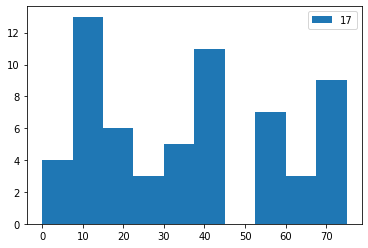

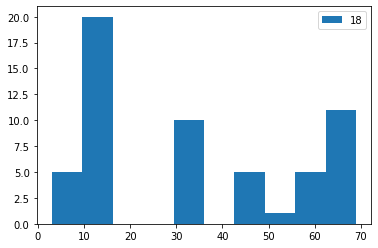

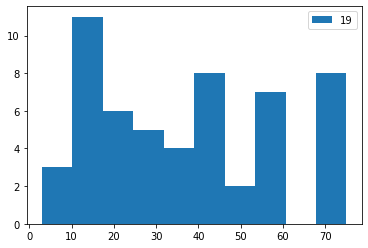

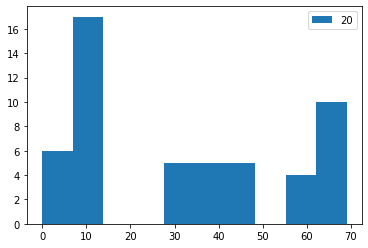

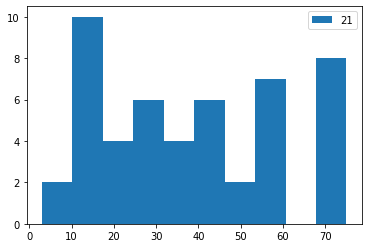

[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 0]


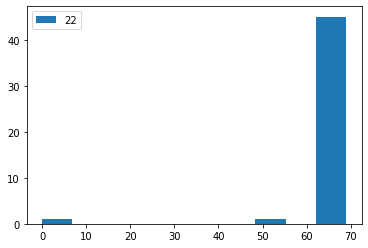

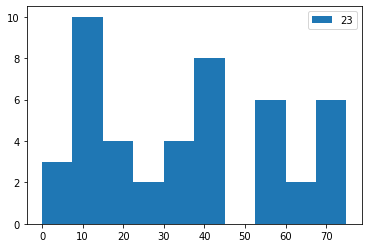

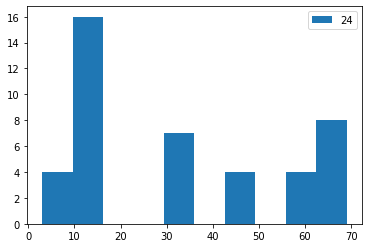

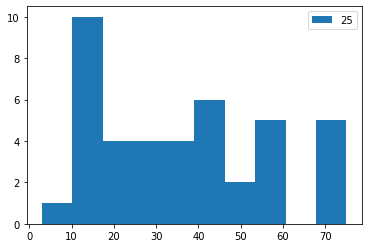

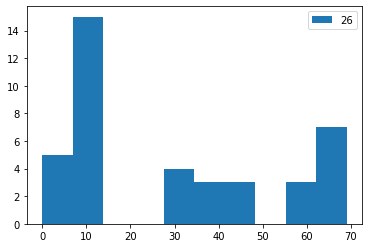

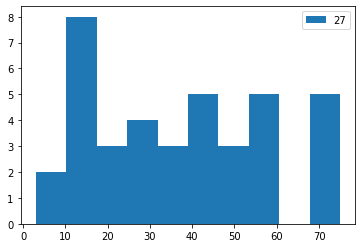

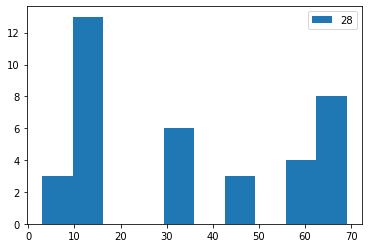

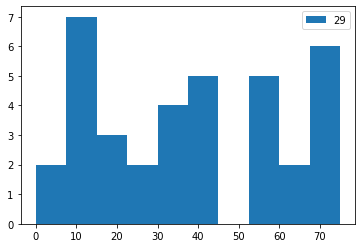

In [12]:
for period in range(2,30):
    letters_alpha = {i: [] for i in range(period)}
    dif_flat = diff.flatten()
    for i in range(len(dif_flat)):
        letters_alpha[i % period].append(dif_flat[i])
    #print(f'Period = {period}, pvalue_shapiro = {st.jarque_bera(letters_alpha[1])[1]}')
    if period == 22:
        print(letters_alpha[1])
    plt.hist(letters_alpha[0], label=period)
    plt.legend()
    plt.show()

Заметим, что для period=22 значения максимально скучкованы. Это и есть настоящая длина фразы.

In [18]:
period = 22
letters= []
lst = []
alpha = 3.1
words = ''
for i in range(period):
    k = 0
    lst.append([])
    while period * k + i < len(dif_flat):
        lst[-1].append(dif_flat[period * k + i])
        k+=1
    letter = chr(round(sum(lst[-1]) / len(lst[-1]) / alpha)+ord('a'))
    letters.append(letter)
    words += letter
print(words)

wheresthemoneylebowski


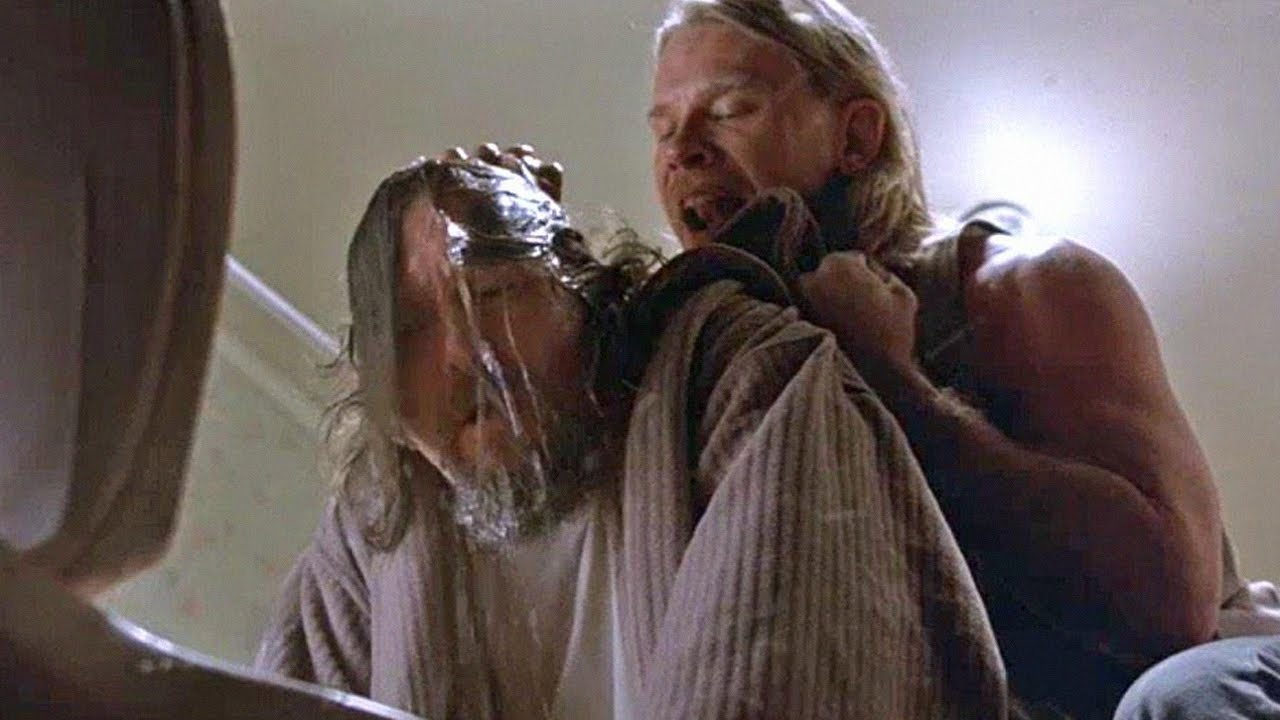

In [24]:
from IPython.display import Image 

display(Image('lebowski.jpg', width = 800))